In [1]:
import sympy
sympy.init_printing()

## GENERIC formulation

$$
		\begin{bmatrix}
			\dot{q} \\
			\dot{p} \\
			\dot{S}_1 \\
			\dot{S}_2
		\end{bmatrix}
		\: = \:
		\begin{bmatrix}
			0 && 1 && 0 && 0 \\
			-1 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
		\end{bmatrix}
		\,
		\begin{bmatrix}
			\left(p_2 - p_1\right) A \\
			v \\
			T_1 \\
			T_2
		\end{bmatrix}
		\: + \:
		\begin{bmatrix}
			0 && 0 && 0 && 0 \\
			0 && 0 && 0 && 0 \\
			0 && 0 && \alpha \, \frac{T_2}{T_1} && -\alpha \\
			0 && 0 && -\alpha && \alpha \, \frac{T_1}{T_2}
		\end{bmatrix}
		\,
		\begin{bmatrix}
			0 \\ 0 \\ 1 \\ 1
		\end{bmatrix}
$$

In [10]:
T_1 = sympy.Symbol('T_1', real=True, positive = True)
T_2 = sympy.Symbol('T_2', real=True, positive = True)
p_1 = sympy.Symbol('p_1', real=True, positive = True)
p_2 = sympy.Symbol('p_2', real=True, positive = True)
v = sympy.Symbol('v', real=True)

A = sympy.Symbol('A', real=True, positive = True)
α = sympy.Symbol('α', real=True, positive = True)

In [3]:
dE = sympy.Matrix([
    [(p_2 - p_1) * A],
    [v],
    [T_1],
    [T_2]
])

In [4]:
dS = sympy.Matrix([
    [0],
    [0],
    [1],
    [1]
])

In [5]:
J = sympy.Matrix([
    [0, 1, 0, 0],
    [-1, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, 0]
])

In [6]:
R = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, α * T_2 / T_1, -α],
    [0, 0, -α, α * T_1 / T_2]
])

In [7]:
J @ dS

In [8]:
R @ dE

In [9]:
(J @ dE + R @ dS).applyfunc(sympy.simplify)

⎡     v      ⎤
⎢            ⎥
⎢A⋅(p₁ - p₂) ⎥
⎢            ⎥
⎢α⋅(-T₁ + T₂)⎥
⎢────────────⎥
⎢     T₁     ⎥
⎢            ⎥
⎢α⋅(T₁ - T₂) ⎥
⎢─────────── ⎥
⎣     T₂     ⎦

## Port-Hamiltonian reformulation

In [11]:
T_0 = sympy.Symbol('T_0', real=True, positive = True)

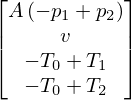

In [12]:
dH = dE - T_0 * dS
dH

### without factorization

In [50]:
D = R / T_0
C = sympy.eye(4)

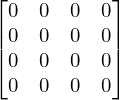

In [51]:
(C @ D @ C.T - 1 / T_0 *R).applyfunc(sympy.simplify)

In [53]:
(C @ D @ C.T) @ dE

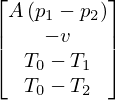

In [54]:
Force = (- C.T @ dH).applyfunc(sympy.simplify)
Force

In [56]:
Flux = (D @ Force).applyfunc(sympy.simplify)
Flux

⎡     0     ⎤
⎢           ⎥
⎢     0     ⎥
⎢           ⎥
⎢      T₂⋅α ⎥
⎢ -α + ──── ⎥
⎢       T₁  ⎥
⎢           ⎥
⎢α⋅(T₁ - T₂)⎥
⎢───────────⎥
⎣     T₂    ⎦

In [57]:
(C @ Flux).applyfunc(sympy.simplify)

⎡     0      ⎤
⎢            ⎥
⎢     0      ⎥
⎢            ⎥
⎢α⋅(-T₁ + T₂)⎥
⎢────────────⎥
⎢     T₁     ⎥
⎢            ⎥
⎢α⋅(T₁ - T₂) ⎥
⎢─────────── ⎥
⎣     T₂     ⎦

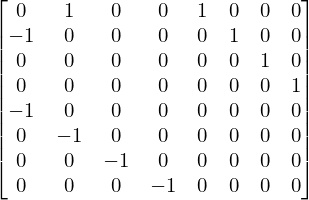

In [59]:
sympy.Matrix(sympy.BlockMatrix([
    [J, C],
    [-C.T, sympy.zeros(4,4)]
]))

$$
\begin{bmatrix}
    \dot{x} \\
    \delta
\end{bmatrix}
\: = \:
\begin{bmatrix}
    J && I \\
    -I && 0
\end{bmatrix}
\,
\begin{bmatrix}
    \frac{\partial H}{\partial x} \\
    \phi
\end{bmatrix}
$$

$$
\phi \: = \: D \, \delta
$$

$
D(\frac{\partial H}{\partial x}) = \frac{1}{T_0} \, R(\frac{\partial H}{\partial x})
$

### factorization of R

$R = T_0 \, C \, D \, C^\mathrm{T}$  
with $C = C(x)$ (to have $\Gamma$ independent of $\frac{\partial H}{\partial x}$)  
and with $D$ a positive semidefinite diagonal matrix

In this (lumped) case, such a factorization is not possible.
The following shows to factorizations for which $C = C \Bigl( \frac{\partial H}{\partial x} \Bigr)$

In [39]:
D = sympy.diag(0, 0, α / T_0, α / T_0)

In [40]:
C = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, -sympy.sqrt(T_2 / T_1), 0],
    [0, 0, +sympy.sqrt(T_1 / T_2), 0]
])

In [23]:
C = sympy.Matrix([
    [0, 0, 0, 0],
    [0, 0, 0, 0],
    [0, 0, 0, +sympy.sqrt(T_2 / T_1)],
    [0, 0, 0, -sympy.sqrt(T_1 / T_2)]
])

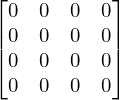

In [43]:
(C @ D @ C.T - 1 / T_0 *R).applyfunc(sympy.simplify)

In [44]:
C.T @ dE

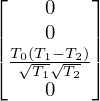

In [45]:
Force = (- C.T @ dH).applyfunc(sympy.simplify)
Force

In [46]:
Flux = D @ Force
Flux

⎡      0      ⎤
⎢             ⎥
⎢      0      ⎥
⎢             ⎥
⎢ α⋅(T₁ - T₂) ⎥
⎢─────────────⎥
⎢  ____   ____⎥
⎢╲╱ T₁ ⋅╲╱ T₂ ⎥
⎢             ⎥
⎣      0      ⎦

In [47]:
(C @ Flux).applyfunc(sympy.simplify)

⎡     0     ⎤
⎢           ⎥
⎢     0     ⎥
⎢           ⎥
⎢      T₂⋅α ⎥
⎢ -α + ──── ⎥
⎢       T₁  ⎥
⎢           ⎥
⎢α⋅(T₁ - T₂)⎥
⎢───────────⎥
⎣     T₂    ⎦

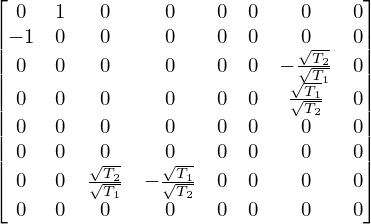

In [48]:
sympy.Matrix(sympy.BlockMatrix([
    [J, C],
    [-C.T, sympy.zeros(4,4)]
]))

$$
\begin{bmatrix}
    \dot{x} \\
    \delta
\end{bmatrix}
\: = \:
\begin{bmatrix}
    J && C(\frac{\partial H}{\partial x}) \\
    -C^\mathrm{T}(\frac{\partial H}{\partial x}) && 0
\end{bmatrix}
\,
\begin{bmatrix}
    \frac{\partial H}{\partial x} \\
    \phi
\end{bmatrix}
$$

$$
\phi \: = \: D \, \delta
$$

$
C(\frac{\partial H}{\partial x}) \, D(\alpha) \, C^\mathrm{T}(\frac{\partial H}{\partial x}) = \frac{1}{T_0} \, R(\frac{\partial H}{\partial x})
$